<a href="https://colab.research.google.com/github/compi1234/pyspch/blob/master/test/spectrogram_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spectrogram Test Notebook

This notebook demonstrates the varies functionalities available within the **pyspch.spectrogram** module

- plotting of waveforms , spectrograms and segmentations
- computation of basic and mel spectrograms (wrappers around libosa)

Date: 07/05/2021 , 12/05/2021

## First do all the imports


In [1]:
# You may need to install following packages
# !pip install git+https://github.com/compi1234/pyspch.git
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [3]:
%matplotlib inline
import os,sys,io 
import scipy.signal

from urllib.request import urlopen
from IPython.display import display, Audio, HTML, clear_output
from ipywidgets import interact

import math,time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 

import librosa as librosa
    
import pyspch.spg as Sps
import pyspch.audio as Spa
import pyspch.display as Spd
import pyspch.io.timit as Spio

## 1. Read in audio data and compute spectrograms

In [3]:
# read a datafile
dir='https://homes.esat.kuleuven.be/~spchlab/data/'
file = "timit/si1027" #@param {type:"string"}
wavfile = dir+file+".wav" 
wavdata, sr = Spa.load(wavfile)

# compute a standard spectrogram and a 80 and 24 channel mel filterbank
spg1 = Sps.spectrogram(wavdata,sample_rate=sr,n_mels=None)
spg80 = Sps.spectrogram(wavdata,sample_rate=sr,n_mels=80)
spg24 = Sps.spectrogram(wavdata,sample_rate=sr,n_mels=24)

# get segmentations
segwrd = Spio.read_seg_file(dir+file+ ".wrd",dt=1/sr,fmt='float32')
segphn = Spio.read_seg_file(dir+file+ ".phn",dt=1/sr,fmt='float32',xlat='map61_cmu')


#### (a) Basic Plot
x-axis is displayed on index basis

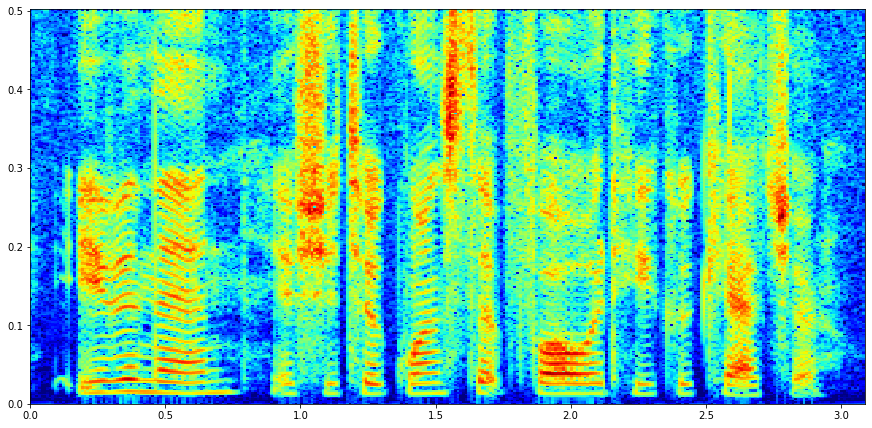

In [4]:
Spd.PlotSpg(spg1)

#### to align time waveform and spectrogram, the plotting routine must know a frame shift in samples (or time)

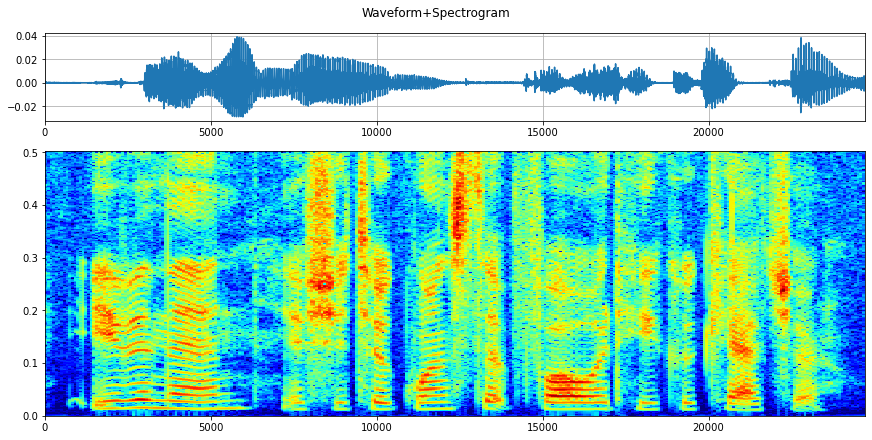

In [9]:
fig=Spd.PlotSpg(spgdata=spg1,wavdata=wavdata,shift=80,title="Waveform+Spectrogram")
display(fig)

#### (b) Basic Plot with Physical Units
- adding sample_rate to the arguments, everything will be displayed using time-units on the x-axis
- ylabel is the label for the frequency axis
- The y-axis is inferred from sampling frequency and number of parameters in spg; it could be overridden with a 'dy' parameter

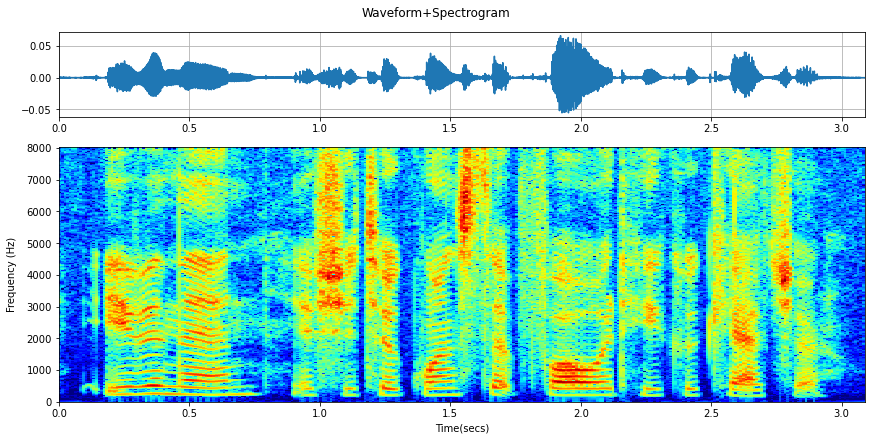

In [12]:
Spd.PlotSpg(spg1,wavdata=wavdata,sample_rate=sr,title="Waveform+Spectrogram",ylabel='Frequency (Hz)')

#### (c) A plot with multiple spectrograms
when adding sample_rate to the arguments, everything will be displayed using time-units on the x-axis

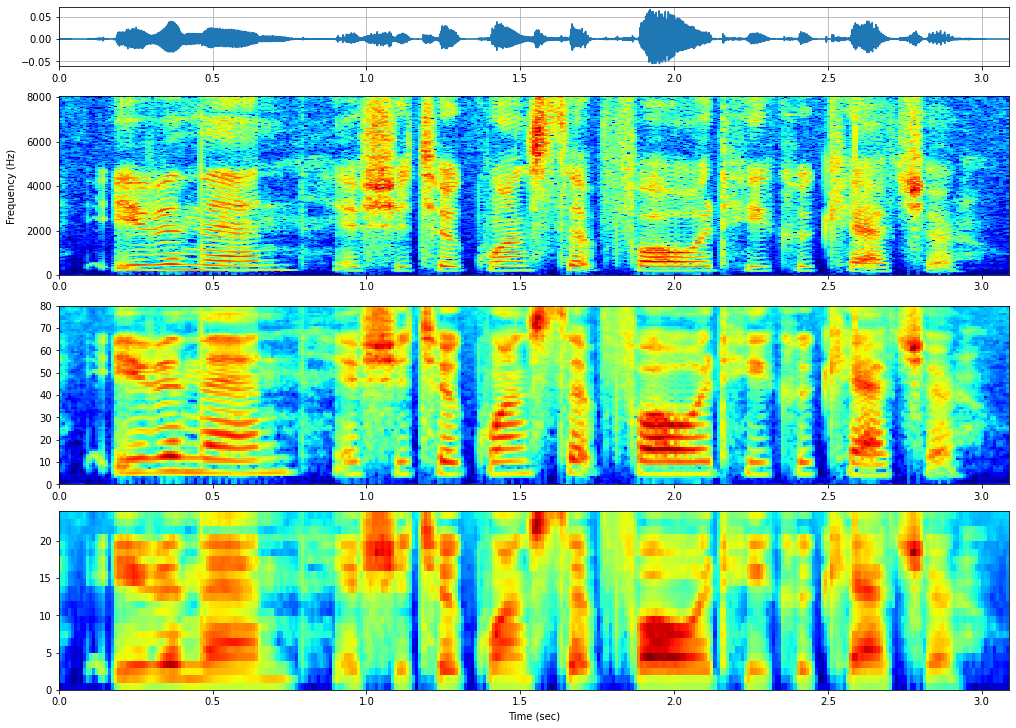

In [17]:
Spd.PlotSpgFtrs(wavdata=wavdata,spgdata=spg1,img_ftrs=[spg80,spg24],sample_rate=sr,figsize=(14,10))

## 2. Spectrogram Plots overlayed with Segmenations

#### Spectrograms with added segmentations
- a word segmenation is added to the waveform plot
- a phone segmenation is added to the spectrogram plot

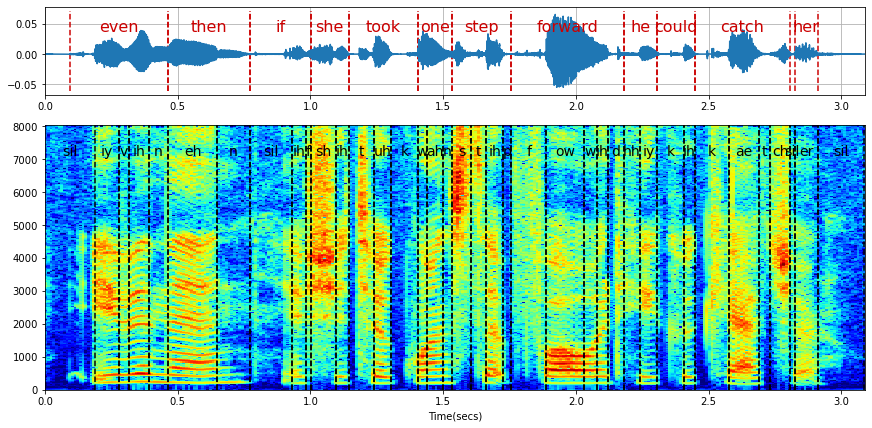

In [20]:
fig = Spd.PlotSpg(spg1,wavdata=wavdata,segwav=segwrd,segspg=segphn,sample_rate=sr)
display(fig)
display(Audio(data=wavdata,rate=sr))

#### Zooming in with frame selection
- via the parameter frames[] given first and last frame

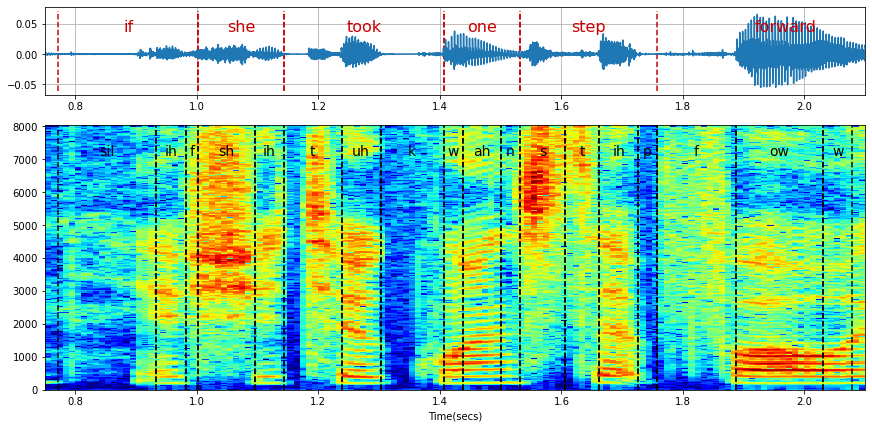

In [21]:
Spd.PlotSpg(spg1,wavdata=wavdata,segwav=segwrd,segspg=segphn,frames=[75,210],sample_rate=sr)


## Making your own plots with the low level API
- first create the axis, only specifying the respective height ratios
- then add lines, images or segmentations to the individual axis
- remark: 
    + when placing segmentations in an empty box, then the time limits must be passed via xlim
    + when overlaying segmentations in an existing box, the time axis is inherited, though you may need to specify dx= sampling period

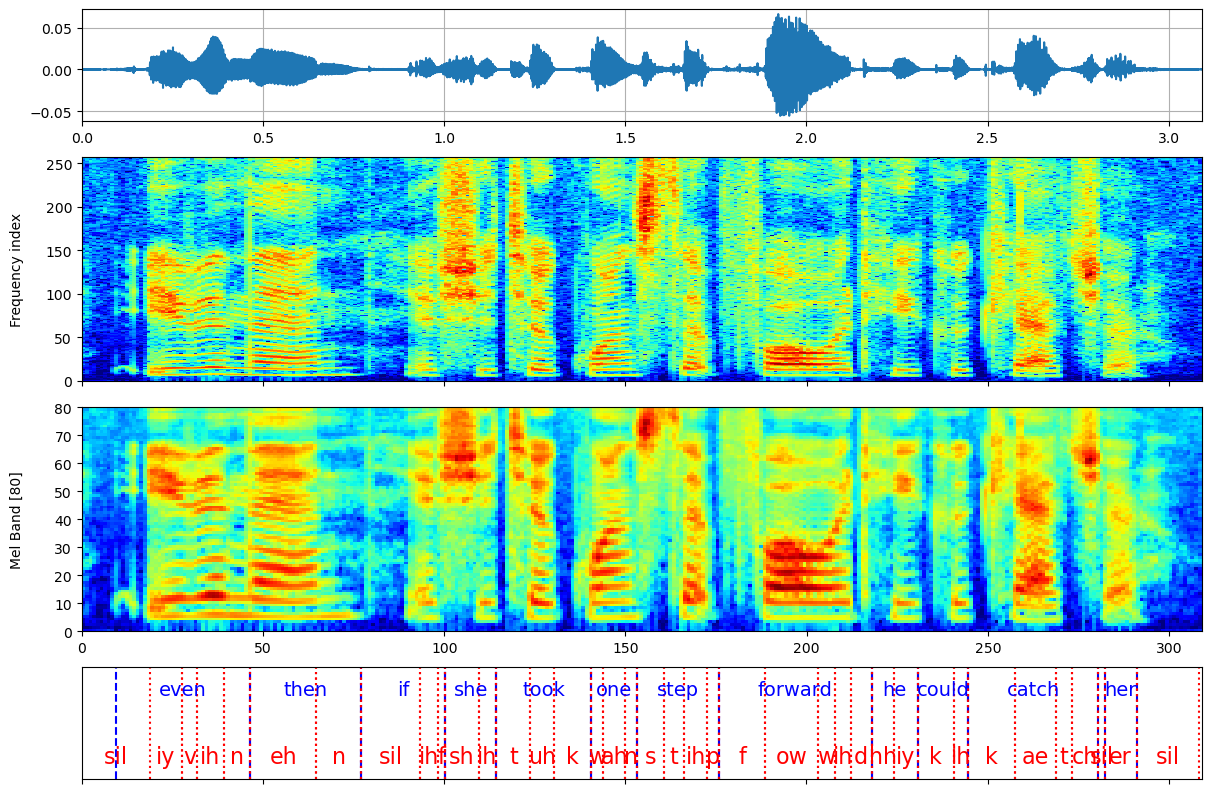

In [25]:
plt.close('all')
def MyPlot(wavdata,sr,spg1,spg2,seg1,seg2,title=None):   
    fig = Spd.SpchFig(figsize=(12,8),row_heights=[1.,2.,2.,1.],dpi=100)
    fig.add_line_plot(wavdata,iax=0,dx=1./sr)
    fig.add_img_plot(spg1,iax=1,xticks=False)
    fig.add_img_plot(spg2,iax=2)
    fig.add_seg_plot(seg1,iax=3,xrange=fig.axes[0].get_xlim(),ypos=0.8,
                     txtargs={'color':'blue','fontsize':14},lineargs={'color':'blue'}) 
    fig.add_seg_plot(seg2,iax=3,ypos=0.2,lineargs={'linestyles':'dotted'})
    fig.suptitle(title,fontsize=16);
    return fig
fig = MyPlot(wavdata,sr,spg1,spg80,segwrd,segphn)
ax=fig.axes
ax[1].set_ylabel('Frequency index')
ax[2].set_ylabel('Mel Band [80]')
fig.align_ylabels(ax[:])
display(fig)
display(Audio(data=wavdata,rate=sr))

## Spectrogram and waveform plot with optional segmentations

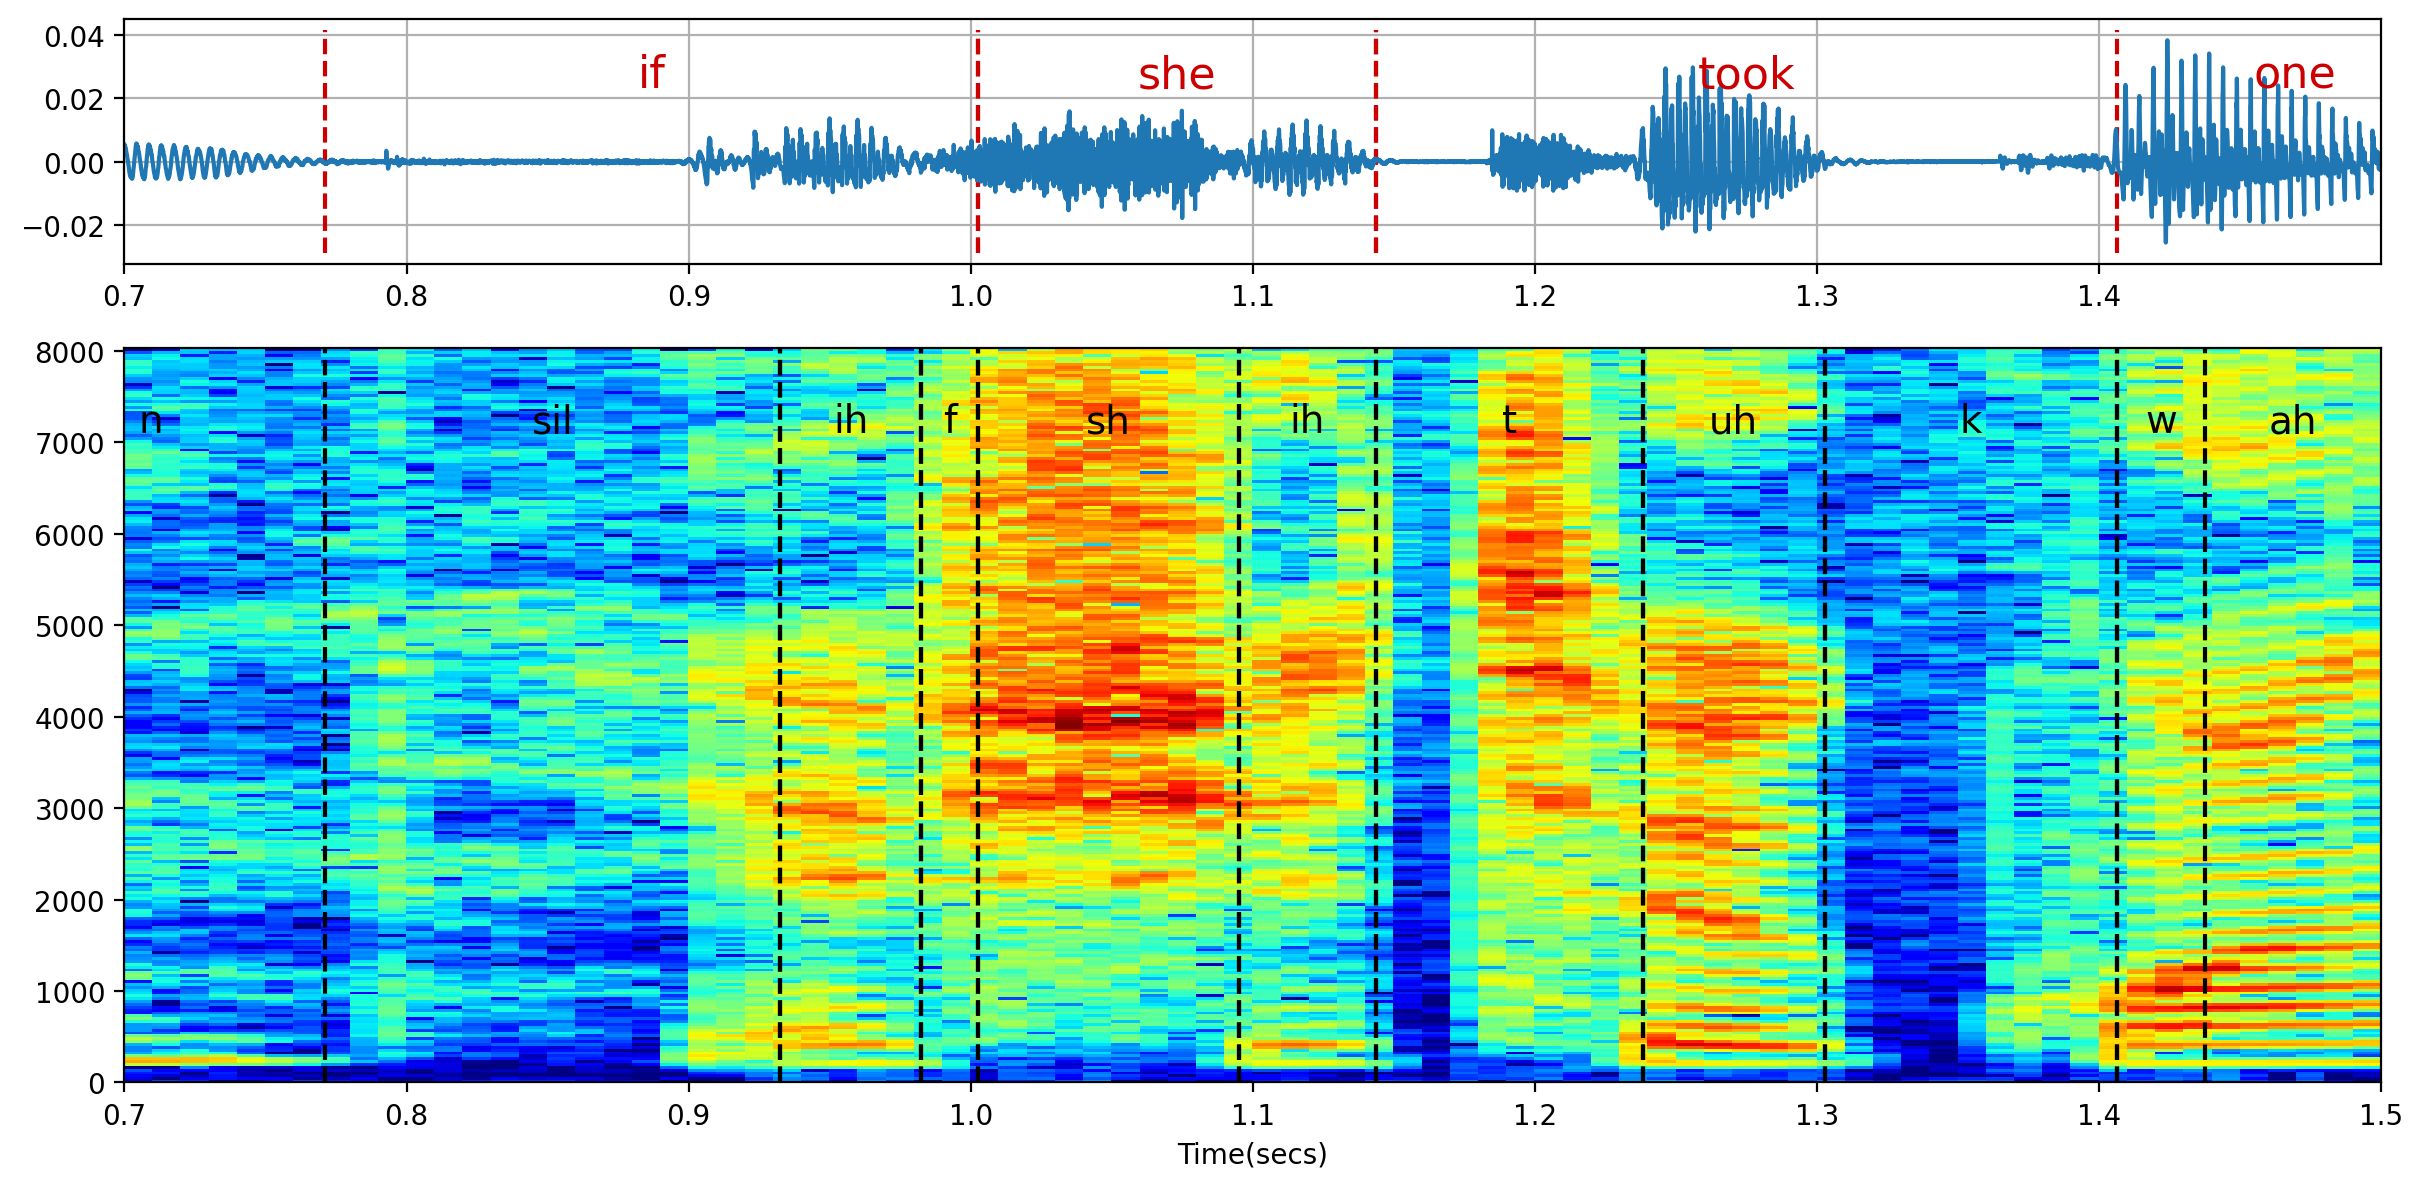

In [26]:
#fig,_ = plot_spg(spg,segspg=segphn39)
fig = Spd.PlotSpg(spg1,wavdata=wavdata,segwav=segwrd,segspg=segphn,frames=[70,150],sample_rate=sr,dpi=200)
display(fig)
display(Audio(data=wavdata,rate=sr))

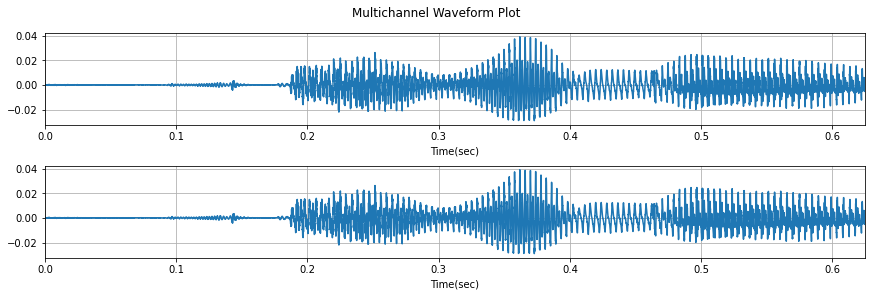

In [28]:
waveform = np.vstack((wavdata,wavdata))
fig=Spd.PlotWaveform(waveform[:,0:10000],sr,title="Multichannel Waveform Plot",figsize=(12,4));
display(fig)

## INTERACTIVE FIGURES

#### (a) Reusing the axis for multiple plots in interactive setting

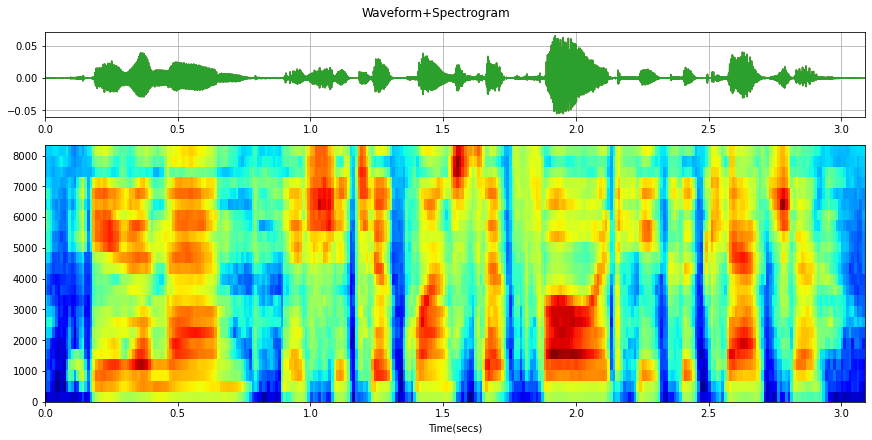

In [30]:
fig = Spd.PlotSpg(spg1,wavdata=wavdata,sample_rate=sr,title="Waveform+Spectrogram")
# do a plt.close() to overtake control of the display
plt.close()
display(fig)
time.sleep(1)
Spd.PlotSpg(spg80,fig=fig,wavdata=wavdata,sample_rate=sr,title="Waveform+Spectrogram")
clear_output(wait=True)
display(fig);
time.sleep(1)
Spd.PlotSpg(spg24,fig=fig,wavdata=wavdata,sample_rate=sr,title="Waveform+Spectrogram")
clear_output(wait=True)
display(fig);

## Data with higher sampling rates

In [7]:
wavfile = "http://homes.esat.kuleuven.be/~compi/demos/AuditoryDemonstrations/"+"TrackNo01.wav"
wavdata, sr = Spa.load(wavfile,sample_rate=16000)

# compute a standard spectrogram and a 80 and 24 channel mel filterbank
spg1 = Sps.spectrogram(wavdata,sample_rate=sr,n_mels=None)


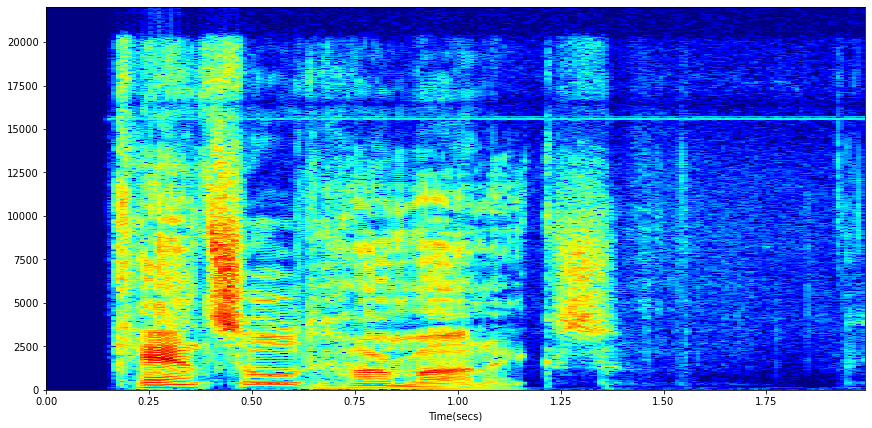

In [19]:
sample_rate=44100
wavdata, sr = Spa.load(wavfile,sample_rate=sample_rate)
wav1 = wavdata[0:(sample_rate*2)]
spg1 = Sps.spectrogram(wav1,sample_rate=sr,n_mels=None)
Spd.PlotWaveform(wav1)
Spd.PlotSpg(spg1,sample_rate=sr)

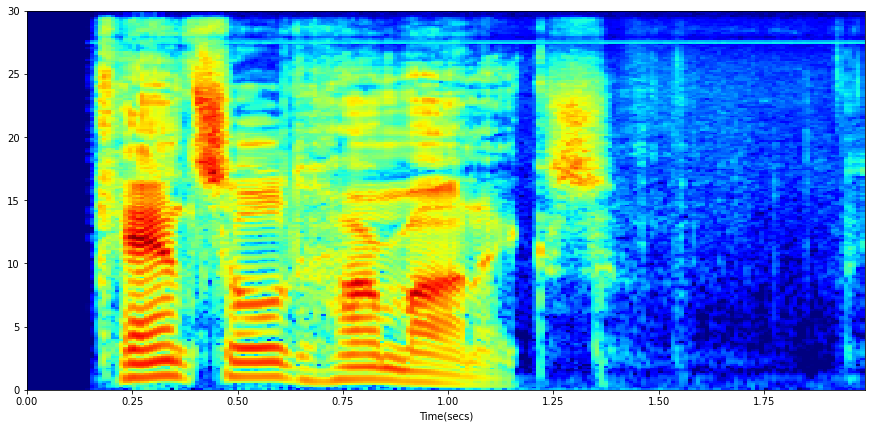

In [24]:
spg1 = Sps.spectrogram(wav1,sample_rate=sr,n_mels=200)
Spd.PlotWaveform(wav1)
Spd.PlotSpg(spg1,sample_rate=sr,dy=30/200)